In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# WordCloud and matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /home/irina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/irina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/irina/nltk_data...
[nltk_data]   Package words is already up-to-date!


## TO DO

- assigning keywords to missing keyword labels - DONE
- remove symbols (#, ".. - DONE
- remove links - DONE
- validation
- make slides - IN PROCESS
- TFIDF, LSA, LSTM / RNNs, the list is long
- try different classifiers
- reading discussion board for inspiration


In [9]:
train_df = pd.read_csv("preprocessed_train_data.csv")

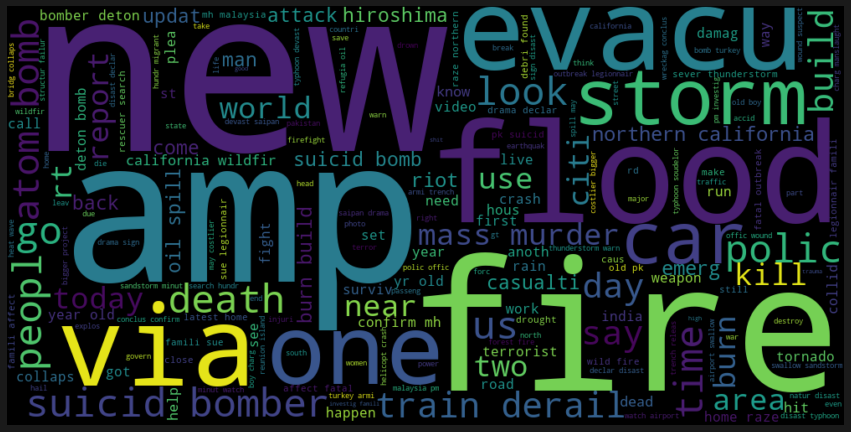

In [10]:
# Data Visualization using WordCloud (for Disaster)

disaster = ' '.join(list(train_df[train_df['target'] == 1] ['text']))
dis_wordcloud = WordCloud(width = 1000, height = 500).generate(disaster) # Generate a word cloud image
plt.figure(figsize = (15,8), facecolor = 'k')
plt.imshow(dis_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


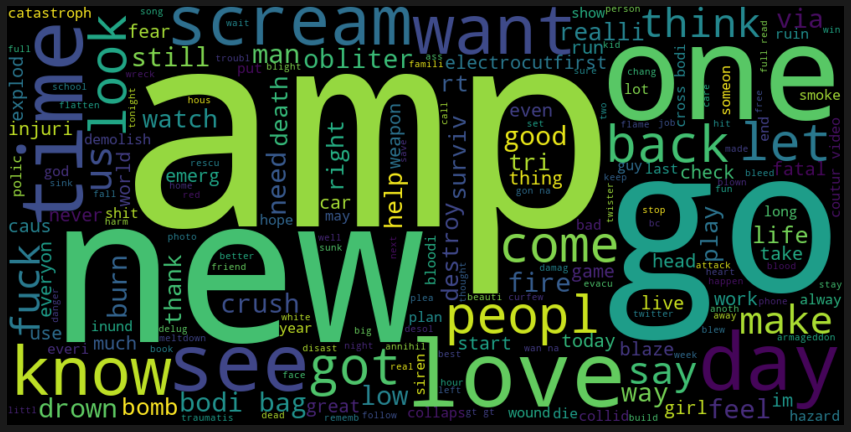

In [12]:
# Data Visualization using WordCloud (for non-Disaster)
non_disaster = ' '.join(list(train_df[train_df['target'] == 0] ['text']))
nondis_wordcloud = WordCloud(width = 1000, height = 500).generate(non_disaster) # Generate a word cloud image
plt.figure(figsize = (15,8), facecolor = 'k')
plt.imshow(nondis_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Let's look at our data... first, an example of what is NOT a disaster tweet.




In [13]:
train_df[train_df["target"] == 0]["text"].values[1]

'  love fruit'

And one that is:

In [14]:
train_df[train_df["target"] == 1]["text"].values[1]

'  forest fire near la rang ask canada'

# TFIDF



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(tweet_text).toarray()
labels = train_df.target
print(features)
features.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(7613, 3227)

In [16]:
train_vectors = tfidf.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.

test_vectors = tfidf.transform(test_df["text"])



# Our model

As we mentioned above, we think the words contained in each tweet are a good indicator of whether they're about a real disaster or not. The presence of particular word (or set of words) in a tweet might link directly to whether or not that tweet is real.

What we're assuming here is a linear connection. So let's build a linear model and see!


In [17]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()




Let's test our model and see how well it does on the training data. For this we'll use cross-validation - where we train on a portion of the known data, then validate it with the rest. If we do this several times (with different portions) we can get a good idea for how a particular model or method performs.

The metric for this competition is F1, so let's use that here.


In [18]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.60371517, 0.56061332, 0.6226506 ])



The above scores aren't terrible! It looks like our assumption will score roughly 0.65 on the leaderboard. There are lots of ways to potentially improve on this (TFIDF, LSA, LSTM / RNNs, the list is long!) - give any of them a shot!

In the meantime, let's do predictions on our training set and build a submission for the competition.


In [29]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [31]:
sample_submission = pd.read_csv("sample_submission.csv")

In [32]:
sample_submission["target"] = clf.predict(test_vectors)

In [33]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [20]:
sample_submission.to_csv("submission.csv", index=False)



Now, in the viewer, you can submit the above file to the competition! Good luck!
